In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
a = 'the Sun of beach and beach'
b = 'moon earth moon'

In [6]:
text = [a, b]

tfv = TfidfVectorizer(stop_words='english')
matrix = tfv.fit_transform(text)
print(tfv.get_feature_names())
print(matrix.toarray().round(3))

['beach', 'earth', 'moon', 'sun']
[[0.894 0.    0.    0.447]
 [0.    0.447 0.894 0.   ]]


In [7]:
import pandas as pd

matrix = matrix.todense()
df = pd.DataFrame(matrix, columns=tfv.get_feature_names(), index=['a', 'b'])
df.round(3)

/Users/apple/opt/anaconda3/envs/opencv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,beach,earth,moon,sun
a,0.894,0.000,0.000,0.447
b,0.000,0.447,0.894,0.000


In [9]:
a = 'the Sun of beach and beach'
b = 'moon earth moon'

text = [a, b]

tfv = TfidfVectorizer()
matrix = tfv.fit_transform(text)
print(tfv.get_feature_names())
print(matrix.toarray().round(3))

['and', 'beach', 'earth', 'moon', 'of', 'sun', 'the']
[[0.354 0.707 0.    0.    0.354 0.354 0.354]
 [0.    0.    0.447 0.894 0.    0.    0.   ]]


In [10]:
import pandas as pd

matrix = matrix.todense()
df = pd.DataFrame(matrix, columns=tfv.get_feature_names(), index=['a', 'b'])
df.round(3)

,and,beach,earth,moon,of,sun,the
a,0.354,0.707,0.000,0.000,0.354,0.354,0.354
b,0.000,0.000,0.447,0.894,0.000,0.000,0.000


In [11]:
#workshop 2

In [16]:
a = 'the Sun of beach and beach'
b = 'moon earth moon'
c = 'the sun is an object in the sky'
d = '...'

text = [a, b, c, d]
tfv = TfidfVectorizer()
matrix = tfv.fit_transform(text)
print(tfv.get_feature_names())
print(matrix.toarray().round(3))
matrix = matrix.todense()
df = pd.DataFrame(matrix, columns=tfv.get_feature_names(), index=['a', 'b', 'c', 'd'])
df.round(3)

['an', 'and', 'beach', 'earth', 'in', 'is', 'moon', 'object', 'of', 'sky', 'sun', 'the']
[[0.    0.372 0.743 0.    0.    0.    0.    0.    0.372 0.    0.293 0.293]
 [0.    0.    0.    0.447 0.    0.    0.894 0.    0.    0.    0.    0.   ]
 [0.351 0.    0.    0.    0.351 0.351 0.    0.351 0.    0.351 0.277 0.554]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


,an,and,beach,earth,in,is,moon,object,of,sky,sun,the
a,0.000,0.372,0.743,0.000,0.000,0.000,0.000,0.000,0.372,0.000,0.293,0.293
b,0.000,0.000,0.000,0.447,0.000,0.000,0.894,0.000,0.000,0.000,0.000,0.000
c,0.351,0.000,0.000,0.000,0.351,0.351,0.000,0.351,0.000,0.351,0.277,0.554
d,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [17]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [18]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
news = fetch_20newsgroups(subset='train', categories=categories)

In [19]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [23]:
print(len(news['target_names']))

4


In [24]:
news['target_names']

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [25]:
print(len(news['data']))

2257


In [26]:
news.filenames[:10]

array(['/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38440',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38479',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20737',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20942',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20487',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20891',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20914',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/sci.med/58110',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/sci.med/58114',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/sci.med/58838'],
      dtype='<U93')

In [28]:
np.unique(news['target'])

array([0, 1, 2, 3])

In [31]:
labels, counts = np.unique(news['target'], return_counts=True)
label_str = np.array(news['target_names'])[labels]
list(zip(label_str, counts))

[('alt.atheism', 480),
 ('comp.graphics', 584),
 ('sci.med', 594),
 ('soc.religion.christian', 599)]

In [32]:
import pandas as pd
df = pd.DataFrame(list(zip(label_str, counts)))
df

,0,1
0,alt.atheism,480
1,comp.graphics,584
2,sci.med,594
3,soc.religion.christian,599


/Users/apple/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


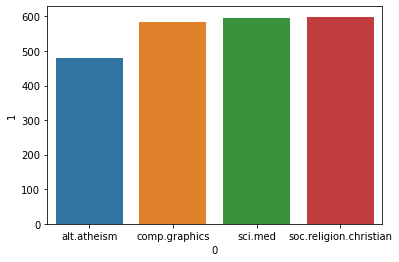

In [36]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.barplot(df[0], df[1])
plt.show()

In [37]:
#workshop 4

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

text = news['data']
cv = CountVectorizer()

count_matrix = cv.fit_transform(text)

word_matrix = count_matrix.toarray()

df = pd.DataFrame(word_matrix, columns=cv.get_feature_names())
df.head()

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df.shape

(2257, 35482)

In [44]:
df[df.columns[10000:10010]].head()

,counseling,counselling,counselor,count,counted,countenance,counter,counter_clockwise,counteract,counterargument
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [45]:
dfsum = df.sum(axis=0, skipna=True)
bow = dfsum.sort_values(ascending=False)[:30]
bow

the        29825
of         17660
to         17222
and        13017
is         12343
in         11226
that       10723
it          8447
you         6157
for         5962
not         5285
this        5063
be          4898
from        4877
are         4769
edu         4675
have        4218
as          4015
on          3709
with        3655
but         3453
or          3432
if          3208
was         3020
can         2818
we          2674
there       2556
by          2548
what        2472
subject     2464
dtype: int64

/Users/apple/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


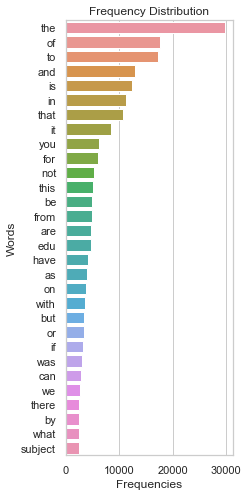

In [47]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(style='whitegrid')
plt.subplots(figsize=(3, 8))
sb.barplot(bow.values, bow.index)
plt.ylabel('Words')
plt.xlabel('Frequencies')
plt.title('Frequency Distribution')
plt.show()

In [48]:
#workshop 5

In [49]:
print(news['data'][0])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [52]:
X = news['data']
y = news['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [67]:
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

start_time = time.time()
tvec = TfidfVectorizer(stop_words='english')
X_train_tfidf = tvec.fit_transform(X_train)
X_test_tfidf = tvec.transform(X_test)

model = MultinomialNB(alpha=0.005)
model.fit(X_train_tfidf, y_train)
end_time = time.time()
score = model.score(X_test_tfidf, y_test)
print('Accuracy: {:.3f}, Time: {:.3f}'.format(score, (end_time - start_time)))

Accuracy: 0.973, Time: 0.519


In [73]:
# new_docs = ['OpenGL on the GPU is fast.']
# new_docs = ['ask about health care topic.']
new_docs = ['God is love. loves you every body.']
new_docs_cv = tvec.transform(new_docs)
y_pred = model.predict(new_docs_cv)
news['target_names'][y_pred[0]]

'soc.religion.christian'

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import time

start = time.time()

pipe1= Pipeline([('vetorsizer', TfidfVectorizer()),
                ('classifier', MultinomialNB(alpha=0.005))])
pipe1.fit(X_train, y_train)

end = time.time()

score = model.score(X_test_tfidf, y_test)
print('Accuracy: {:.3f}, Time: {:.3f}'.format(score, (end_time - start_time)))

Accuracy: 0.973, Time: 0.519


In [77]:
new_docs = ['OpenGL on the GPU is fast.', 
            'ask about health care topic.', 
            'God is love. loves you every body.']
new_docs_cv = tvec.transform(new_docs)
y_pred = model.predict(new_docs_cv)
for k in y_pred:
    print(news['target_names'][k])

comp.graphics
sci.med
soc.religion.christian
